已尝试设置英文字体。


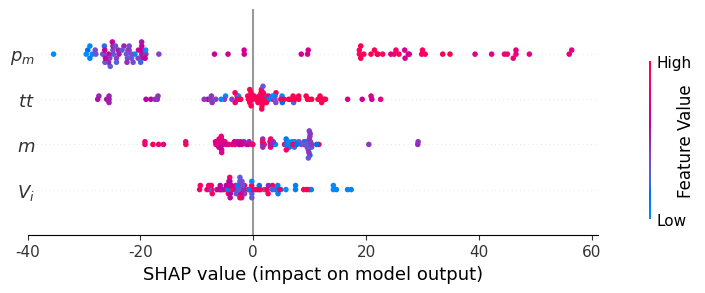

SHAP 摘要图已保存为 /Users/yangmingyue/Desktop/ABO365/训练与测试/xgb/shap_summary_plot_xgb.jpg
脚本执行完毕。


In [2]:
import pandas as pd
import shap
import xgboost as xgb
import matplotlib.pyplot as plt
import matplotlib 


def save_custom_shap_plot(shap_values_data, features_data, filename="shap_summary_plot_xgb.jpg", plot_show=True):

    shap.summary_plot(shap_values_data, features_data, plot_type="dot", show=False, color_bar=True)

    try:

        cbar = plt.gcf().axes[-1] 
        cbar.set_ylabel('Feature Value', fontsize=12, labelpad=-10) 
        cbar.set_yticks([cbar.get_ylim()[0], cbar.get_ylim()[1]])
        cbar.set_yticklabels(['Low', 'High']) 
        box = cbar.get_position()
 
        cbar.set_position([box.x0 + 0.02, box.y0 + 0.05, 0.02, box.height * 0.7])

        ax = plt.gca() 
        ytick_labels = ax.get_yticklabels()
        for label in ytick_labels:

            current_x = label.get_position()[0]
            label.set_x(current_x + 0.07)

    except Exception as e:
        print(f"can not use it: {e}")


    plt.savefig(filename, format="jpg", bbox_inches='tight', pad_inches=0.1, dpi=300)
    if plot_show:
        plt.show() 
    plt.close() 


data_file_path = 'data.csv' 
try:
    data = pd.read_csv(data_file_path)
except FileNotFoundError:
    print(f" '{data_file_path}' is error")
    exit()


feature_names_original = ['m', 'tt', 'Vi', 'pm']
target_name = 'TCF'


if not all(col in data.columns for col in feature_names_original):
    missing_cols = [col for col in feature_names_original if col not in data.columns]
    print(f" '{missing_cols} 'is not in CSV '{data_file_path}' ")
    print(f"{data.columns.tolist()}")
    exit()
if target_name not in data.columns:
    print(f" '{target_name}' is not in CSV '{data_file_path}' ")
    print(f"CSV文件中的列: {data.columns.tolist()}")
    exit()

features_df = data[feature_names_original].copy()
target = data[target_name]

features_df.columns = ['$m$', '$tt$', '$Vi$', '$pm$']

# 步骤 2: 训练 XGBoost 模型
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    learning_rate=0.1,
    max_depth=2,
    random_state=42,
    verbosity=0 
)
model.fit(features_df, target)


explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(features_df)


output_plot_filename = "shap_summary_plot_xgb.jpg" 
save_custom_shap_plot(shap_values, features_df, filename=output_plot_filename)

print(f" {output_plot_filename}")

